In [18]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from data import runDataProcessing, load_processed_data


In [24]:
# Create the new data sets
# Run data.py to process and split the data with the features.py for normalization and encoding
runDataProcessing()

# Load classification data
train_class = load_processed_data("data/processed/splits/train_classification.csv")
val_class = load_processed_data("data/processed/splits/val_classification.csv")
test_class = load_processed_data("data/processed/splits/test_classification.csv")

# Load regression data
train_regres = load_processed_data("data/processed/splits/train_regression.csv")
val_regres = load_processed_data("data/processed/splits/val_regression.csv")
test_regres = load_processed_data("data/processed/splits/test_regression.csv")

# Load the data set
df = pd.read_csv("../data/processed/splits/train_classification.csv", delimiter=',')

# Create the pass/Fail coloum
# df['Pass'] = np.where(df['G3'] >= 10, 'Pass', 'Fail')
print(list(df.columns))
print(df.shape)
df.head()

 Saved train/val/test to data/processed/splits
 Train: 390 | Val: 129 | Test: 130
 Saved train/val/test to data/processed/splits
 Train: 390 | Val: 129 | Test: 130
Data processing and splitting complete.
['sex', 'age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'avg_prev_grades', 'fail_abs_ratio', 'school_MS', 'address_U', 'famsize_LE3', 'Pstatus_T', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_mother', 'guardian_other', 'Pass', 'G3']
(390, 43)


,sex,age,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,...,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other,Pass,G3
0,-0.833377,0.210137,1.310216,1.540715,-0.760032,0.083653,-0.374305,-0.34211,0.794137,3.954874,...,-1.140797,1.607991,-0.242338,-0.545894,-0.353247,-0.53161,0.652973,-0.259681,1,12
1,1.199937,1.031695,0.428131,0.630866,-0.760032,0.083653,-0.374305,-0.34211,0.794137,-0.252853,...,-1.140797,-0.621894,-0.242338,1.831858,-0.353247,-0.53161,-1.531457,-0.259681,1,10
2,-0.833377,-1.432980,-0.453954,-0.278983,0.576718,1.290114,-0.374305,-0.34211,0.794137,-0.252853,...,-1.140797,1.607991,-0.242338,-0.545894,-0.353247,-0.53161,0.652973,-0.259681,1,14
3,1.199937,-0.611422,1.310216,1.540715,-0.760032,-1.122808,-0.374305,-0.34211,0.794137,-0.252853,...,0.876580,-0.621894,-0.242338,-0.545894,-0.353247,-0.53161,0.652973,-0.259681,1,13
4,-0.833377,1.853254,-0.453954,0.630866,-0.760032,-1.122808,1.312667,-0.34211,-1.259229,-0.252853,...,-1.140797,1.607991,-0.242338,-0.545894,-0.353247,-0.53161,-1.531457,3.850879,1,10


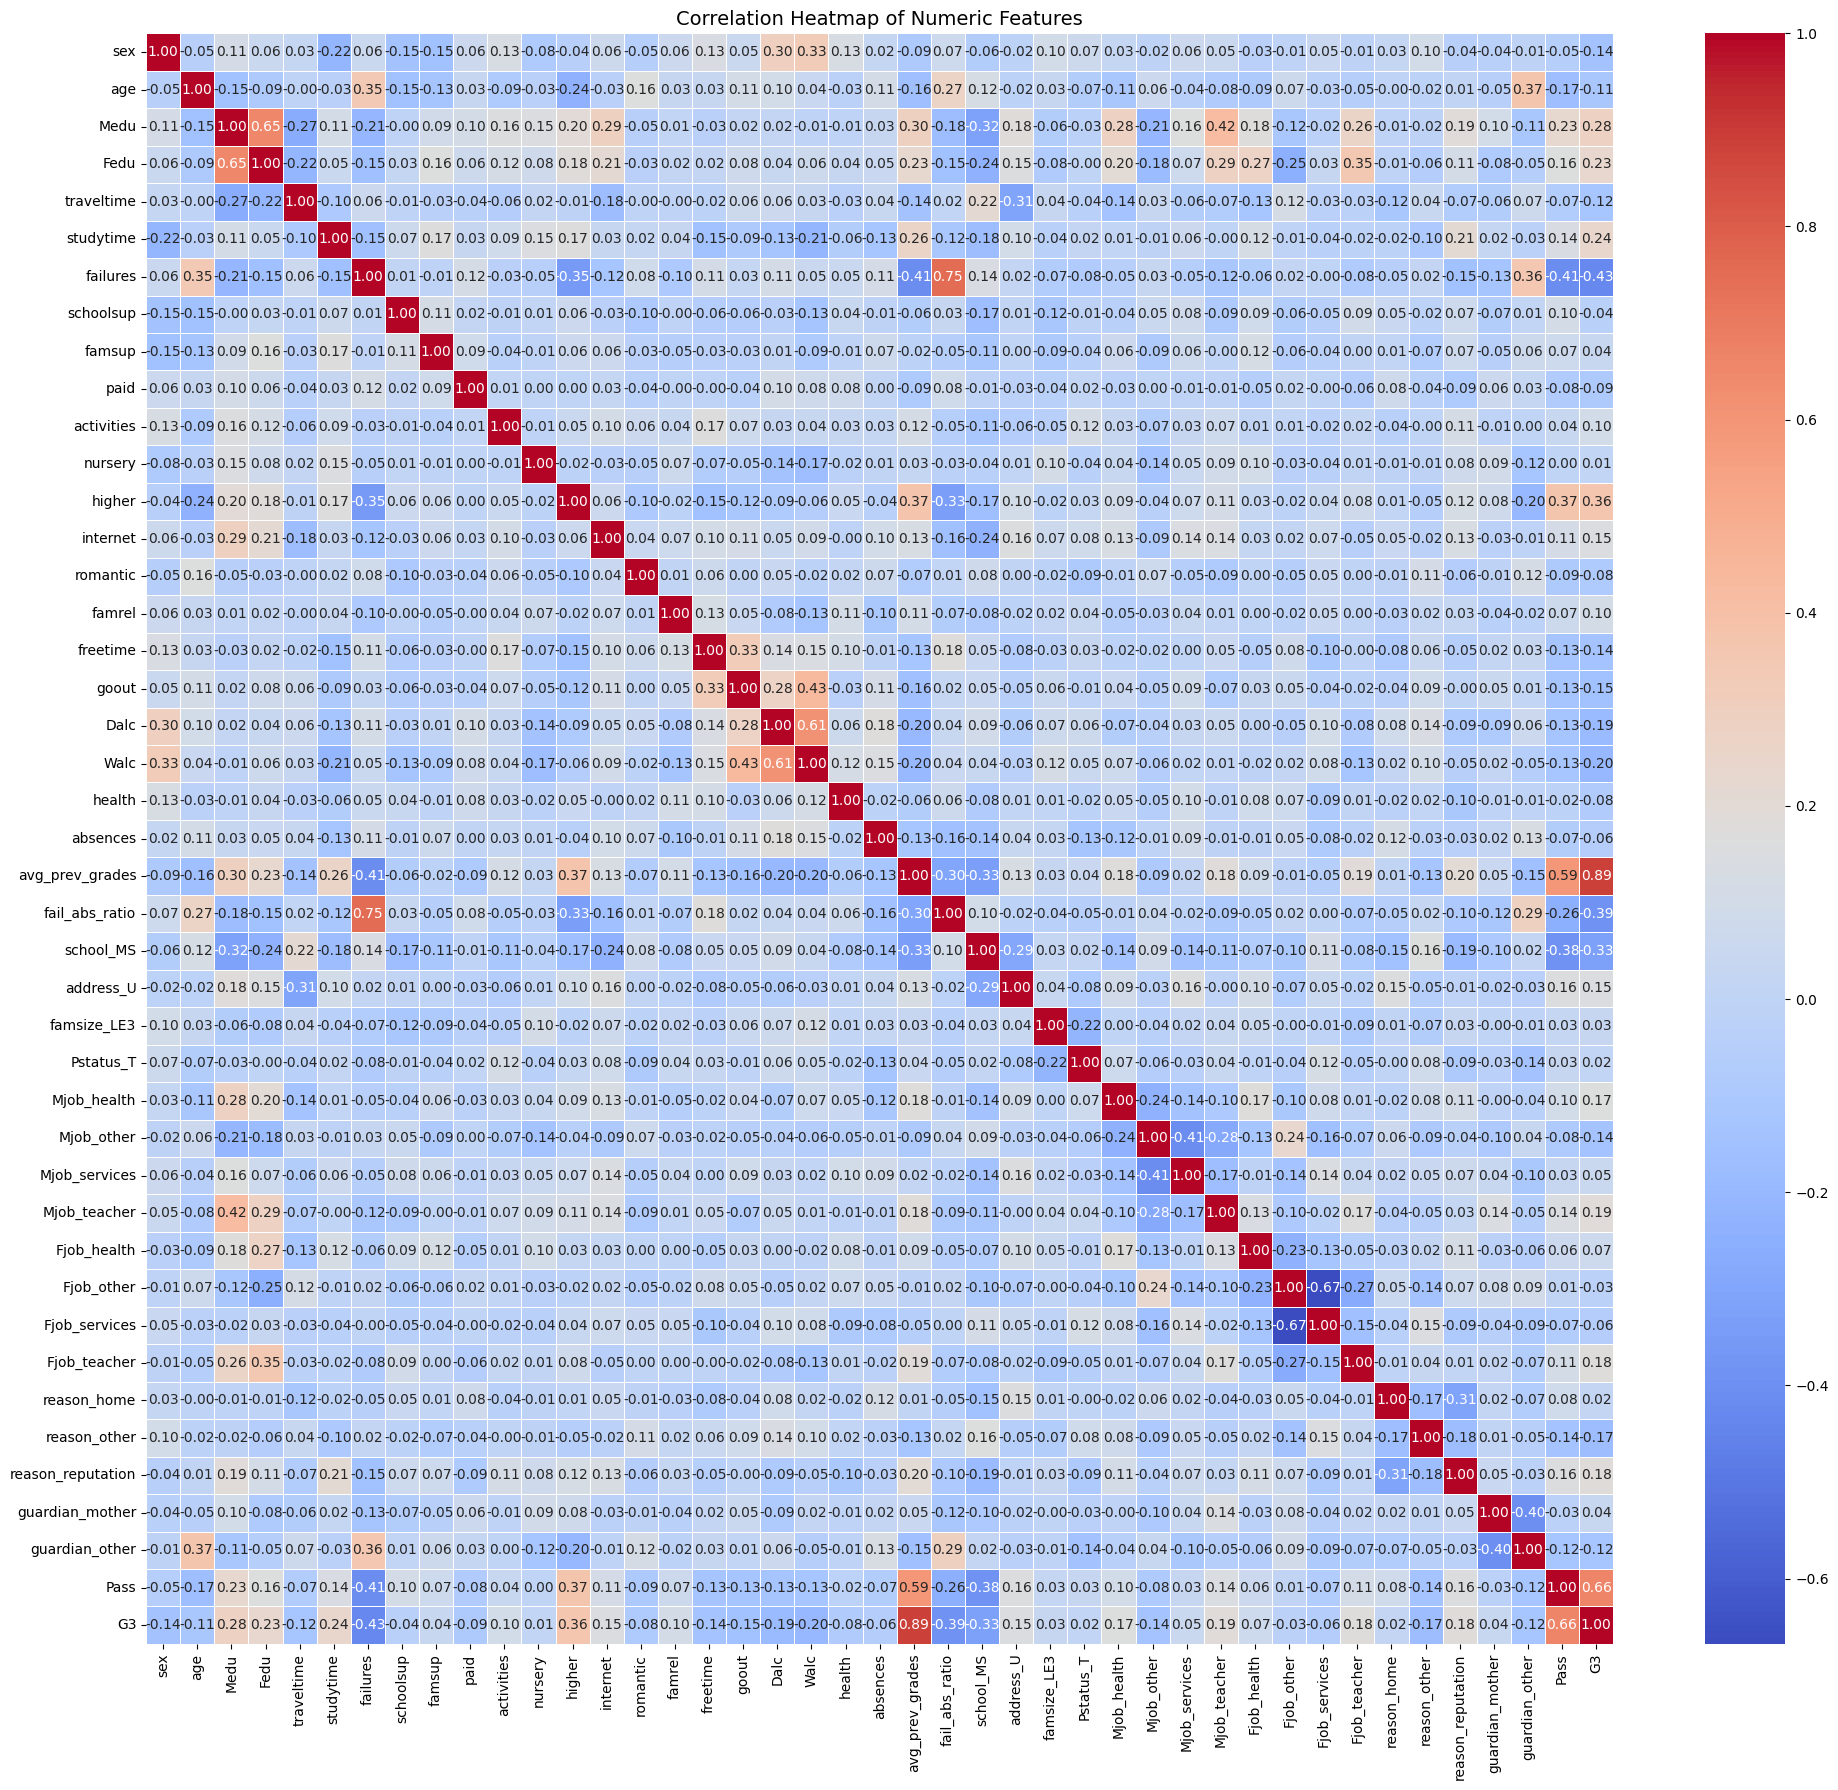

In [25]:
numeric_cols = df.select_dtypes(include=[np.number])

# correlation matrix
corr = numeric_cols.corr()

plt.figure(figsize=(20, 18))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt="0.2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features", fontsize=14)
plt.tight_layout()
plt.show()

#What we notice about G3
- G2 has the biggest relationship to it followed by G1
- Failures also have a correlation to all G1 - G3

Those we can now say are the biggest factors we should be looking into